In [24]:
# Name - Bbiswabasu Roy
# Roll - 19EC30008
# Assignment - 2
# No specific compilation flag required. Run all cells to get output


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data_train = pd.read_csv('project2.csv')
data_train = data_train.sample(frac=1)  # shuffle the training set
X = data_train.loc[:, data_train.columns != 'target']
y = data_train['target']

X_test = pd.read_csv('project2_test.csv')


In [27]:
# splitting into training and validation set
train_len = 280
X_train = X.iloc[:train_len]
y_train = y.iloc[:train_len]
X_val = X.iloc[train_len:]
y_val = y.iloc[train_len:]


In [28]:
# preprocess to standardize all values
mean = (X.mean(axis=0))
std = (X.std(axis=0))
X = (X-mean)/std

X_train = (X_train-mean)/std

X_val = (X_val-mean)/std

X_test = (X_test-mean)/std


In [29]:
def kNN_predict(k, X_train, y_train, X_test):
    eps = 1e-6  # to avoid division by 0 while apllying distance weighted voting
    y_test = []
    for x in X_test:
        distances = []
        for i in range(0, len(X_train)):
            distances.append((compute_distance(X_train[i], x), i))
        distances.sort(key=lambda a: a[0])

        target_count = [0, 0]
        for i in range(0, k):
            # give less voting weightage to far points
            target_count[y_train[distances[i][1]]] += 1/(distances[i][0] + eps)

        if(target_count[0] > target_count[1]):
            y_test.append(0)
        else:
            y_test.append(1)
    return y_test


In [30]:
def compute_distance(x1, x2):
    distance = 0
    for i in range(0, len(x1)):
        distance = distance+pow(x1[i]-x2[i], 2)
    return distance


In [31]:
def compute_error(y_test, prediction):
    error = 0
    for i in range(0, len(y_test)):
        if y_test[i] != prediction[i]:
            error += 1
    error /= len(y_test)
    return error*100


In [32]:
def plot_error(X_test, y_test):
    errors = []
    for k in range(1, 50):
        prediction = kNN_predict(
            k, X_train.values, y_train.values, X_test.values)
        errors.append(compute_error(y_test, prediction))
    plt.plot(range(1, 50), errors, '.-')


Text(0, 0.5, 'Error(%)')

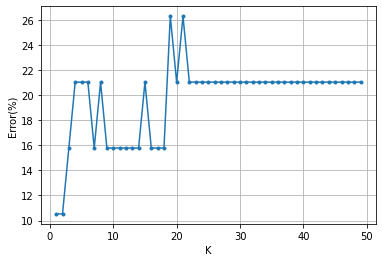

In [33]:
# choose best k based on error on validation set
plot_error(X_val, y_val.values)
plt.grid(True)
plt.xlabel("K")
plt.ylabel("Error(%)")

In [34]:
# as it gives less error on validation set as well as it is close to sqrt(N)
k = 17
prediction = kNN_predict(k, X.values, y.values, X_test.values)

# formatting as required in output file
prediction = str(prediction)
prediction = prediction[1:len(prediction)-1]
prediction = prediction.replace(',', ' ')
f = open("19EC30008_P2.out", "w")
f.write(prediction)
f.close()
